In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("england.csv")
data

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,Bolton Wanderers,Derby County,1888-09-08,3,6,F,england,Bolton Wanderers (England),Derby County (England),england,england,ENG,ENG,Europe,Europe,Europe,national
1,Everton FC,Accrington FC,1888-09-08,2,1,F,england,Everton FC (England),Accrington FC (England),england,england,ENG,ENG,Europe,Europe,Europe,national
2,Preston North End,Burnley FC,1888-09-08,5,2,F,england,Preston North End (England),Burnley FC (England),england,england,ENG,ENG,Europe,Europe,Europe,national
3,Stoke City,West Bromwich Albion,1888-09-08,0,2,F,england,Stoke City (England),West Bromwich Albion (England),england,england,ENG,ENG,Europe,Europe,Europe,national
4,Wolverhampton Wanderers,Aston Villa,1888-09-08,1,1,F,england,Wolverhampton Wanderers (England),Aston Villa (England),england,england,ENG,ENG,Europe,Europe,Europe,national
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48665,Liverpool FC,Wolverhampton Wanderers,2019-05-12,2,0,F,england,Liverpool FC (England),Wolverhampton Wanderers (England),england,england,ENG,ENG,Europe,Europe,Europe,national
48666,Manchester United,Cardiff City,2019-05-12,0,2,F,england,Manchester United (England),Cardiff City (Wales),england,wales,ENG,WAL,Europe,Europe,Europe,national
48667,Southampton FC,Huddersfield Town,2019-05-12,1,1,F,england,Southampton FC (England),Huddersfield Town (England),england,england,ENG,ENG,Europe,Europe,Europe,national
48668,Tottenham Hotspur,Everton FC,2019-05-12,2,2,F,england,Tottenham Hotspur (England),Everton FC (England),england,england,ENG,ENG,Europe,Europe,Europe,national


In [9]:
data.describe()

,gh,ga
count,48670.000000,48670.000000
mean,1.810376,1.167146
std,1.468616,1.142188
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,12.000000,9.000000


In [10]:
data[data['gh'] == 12]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
544,Aston Villa,Accrington FC,1892-03-12,12,2,F,england,Aston Villa (England),Accrington FC (England),england,england,ENG,ENG,Europe,Europe,Europe,national
560,West Bromwich Albion,Darwen,1892-04-04,12,0,F,england,West Bromwich Albion (England),Darwen (England),england,england,ENG,ENG,Europe,Europe,Europe,national
5665,Nottingham Forest,Leicester City,1909-04-21,12,0,F,england,Nottingham Forest (England),Leicester City (England),england,england,ENG,ENG,Europe,Europe,Europe,national


In [11]:
data[data['ga'] == 9]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
5452,Newcastle United,Sunderland Afc,1908-12-05,1,9,F,england,Newcastle United (England),Sunderland Afc (England),england,england,ENG,ENG,Europe,Europe,Europe,national
21404,Cardiff City,Wolverhampton Wanderers,1955-09-03,1,9,F,england,Cardiff City (Wales),Wolverhampton Wanderers (England),wales,england,WAL,ENG,Europe,Europe,Europe,national


In [12]:
home = data[(data['gh'] > data['ga'])]

home = home['home'].value_counts().rename_axis('Team').reset_index(name='points')

home["points"] = 3 * home["points"]

away = data[(data['ga'] > data['gh'])]

away = away['away'].value_counts().rename_axis('Team').reset_index(name='points')

away["points"] = 3 * away["points"]

drawdata = data[(data['ga'] == data['gh'])]

draw = drawdata[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='points')

home1 = home[home.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

draw1 = draw[draw.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

away1 = away.sort_values('Team').reset_index()

total = draw1['points'] + home1['points'] + away1['points']

aggregate = total.rename_axis('Team').reset_index(name='points')

aggregate['Team'] = home1['Team']

aggregate.sort_values(by='points', ascending = False).head(10)

,Team,points
34,Liverpool FC,6839
3,Arsenal FC,6715
25,Everton FC,6646
37,Manchester United,6358
4,Aston Villa,5897
36,Manchester City,5229
58,Tottenham Hotspur,5050
20,Chelsea FC,5034
40,Newcastle United,4851
55,Sunderland Afc,4560


<AxesSubplot:xlabel='Team'>

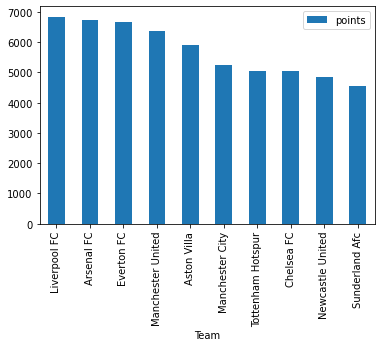

In [13]:
aggregate.sort_values(by='points', ascending = False).head(10).plot.bar(x='Team')

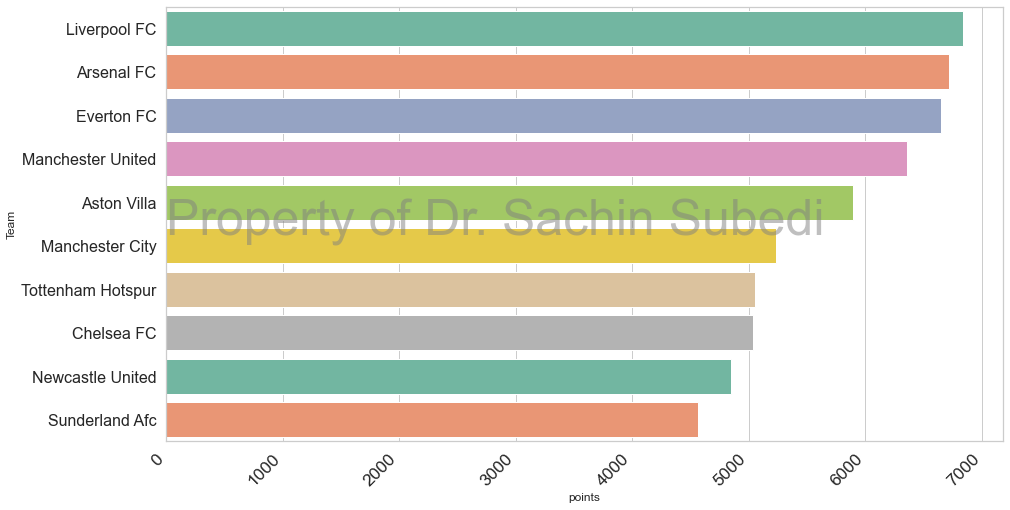

In [14]:
top = aggregate.sort_values(by='points', ascending = False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.barplot(data = top, x = 'points', y = 'Team', palette='Set2')

plt.xticks(

    rotation=45,

    horizontalalignment='right',

    fontweight='light',

    fontsize='x-large' 

)

plt.yticks(

    fontweight='light',

    fontsize='16' 

)

plt.text(3, 5, 'Property of Dr. Sachin Subedi',

         fontsize=50, color='gray',

       va='bottom', alpha=0.5)

plt.show()



In [15]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,Everton FC,4518
1,Arsenal FC,4134
2,Liverpool FC,4134
3,Aston Villa,4070
4,Manchester United,3778
...,...,...
61,Northampton Town,42
62,Leyton Orient,42
63,Swindon Town,42
64,Barnsley FC,38


In [16]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,Everton FC,4518
1,Arsenal FC,4134
2,Liverpool FC,4134
3,Aston Villa,4070
4,Manchester United,3778
...,...,...
61,Northampton Town,42
62,Leyton Orient,42
63,Swindon Town,42
64,Barnsley FC,38
